In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal
import datetime
import seaborn as sns

# Load the Entire excel document consisting of the 4 sheets

In [2]:
comp_df=pd.read_excel('/content/2324MBD41_Project_Dataset-v01.xlsx', sheet_name='COMPANY')
invest_df=pd.read_excel('/content/2324MBD41_Project_Dataset-v01.xlsx', sheet_name='INVESTMENT')
acquisition_df=pd.read_excel('/content/2324MBD41_Project_Dataset-v01.xlsx', sheet_name='ACQUISITION')
emp_df=pd.read_excel('/content/2324MBD41_Project_Dataset-v01.xlsx', sheet_name='EMPLOYEE')

So we will filter out the rows from the company sheet if the 'EMPLOYEE NO' is blank and continue with the project

In [56]:
comp_df=comp_df[comp_df['EMPLOYEE_NUMBER'] != '-']
comp_df

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,COUNTRY,YEAR
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000,United States,2006
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000,China,2014
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100,United States,2016
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+,China,2010
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10,United States,2018
...,...,...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia","Sep 17, 2018",—,—,$1M to $10M,11-50,Colombia,2018
996,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States","Jun 1, 2009",—,—,$50M to $100M,251-500,United States,2009
997,Jupiter,"Delivery, Logistics","San Francisco, California, United States",2019,—,—,Less than $1M,1-10,United States,2019
998,Bank of America,"Asset Management, Banking, Finance, Financial ...","Charlotte, North Carolina, United States","Jul 31, 1998","Jan 13, 1978",—,$10B+,10001+,United States,1998


In [4]:
comp_df.drop_duplicates(subset='COMPANY_NAME', keep='first', inplace=True)
comp_df.describe()

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,977,255,428,269,6,9,10
top,Twitter,"Biotechnology, Health Care, Medical, Pharmaceu...","San Francisco, California, United States",2012,—,—,$1M to $10M,101-250
freq,1,5,173,55,678,995,230,196


Thus there are 1000 unique companies across 45 countries, out of which only 6 has been closed. There are 9 ranges for revenue and 10 ranges of employees.

# Number of Companies from each Country


In [5]:
comp_df['COUNTRY'] = comp_df['LOCATION'].str.split(',').str[-1].str.strip()
comp_df['COUNTRY'].value_counts()



United States           660
United Kingdom           67
India                    61
Germany                  35
China                    29
Canada                   28
Israel                   13
France                   12
Sweden                   10
Switzerland               8
Singapore                 6
Finland                   5
Brazil                    5
Australia                 5
The Netherlands           5
Denmark                   4
Russian Federation        4
Spain                     4
Japan                     3
Ireland                   3
Indonesia                 3
Hong Kong                 3
Belgium                   2
Cayman Islands            2
Mexico                    2
South Africa              2
Kenya                     1
Slovenia                  1
Peru                      1
Estonia                   1
New Zealand               1
Latvia                    1
Chile                     1
United Arab Emirates      1
Bahrain                   1
Poland              

It is very easily observable that USA has the most no of companies, almost 10 times greater than its nearest competitor UK. The 2nd and 3rd spots are respectivelt occupied by UK and India in a very close fight. UK and India has almost double the no of companies than the next 4 nations. After this a sharp declineis observed with the no of companies reducing drastically.

Barchart of Top 10 Categories

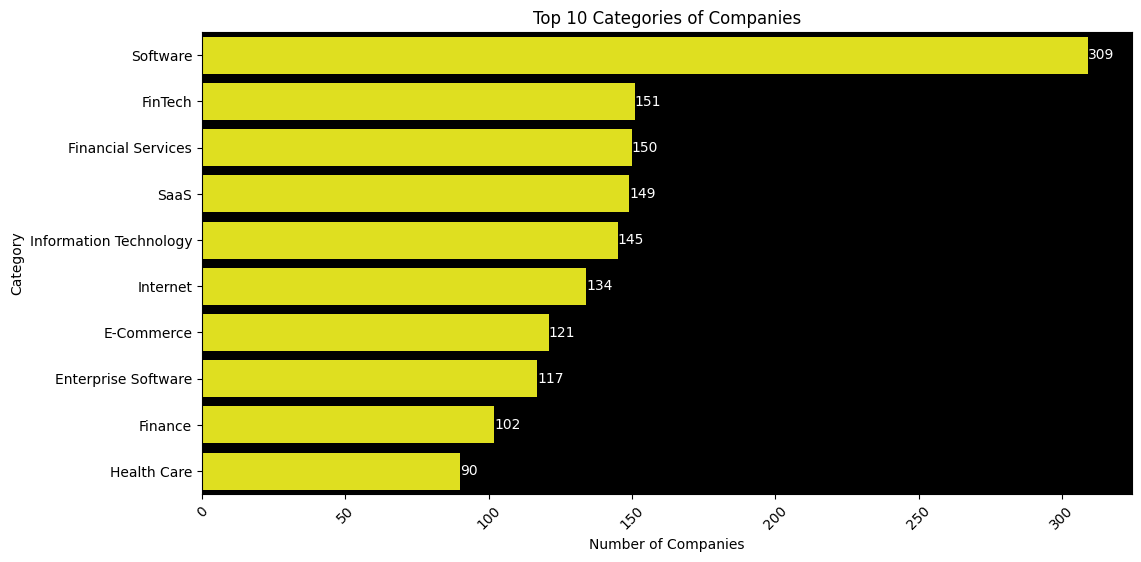

In [101]:

category_counts = {}

for row in comp_df['CATEGORY']:
    # Split the categories in the current row
    categories = row.split(', ')

    # Iterate through each category
    for category in categories:
        # Clean up any whitespace
        category = category.strip()

        # Update the count in the dictionary
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

# Convert "category_counts" Dictionary into dataframe
category_counts_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])
sorted_category_counts_df = category_counts_df.sort_values(by='Count', ascending=False)
sorted_category_counts_df

# Create the barplot for the top 10 categories
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=sorted_category_counts_df.head(10), x='Count', y='Category', color='yellow')
plt.rcParams.update({'axes.facecolor':'black'})
# Annotate each bar with the count
for p in barplot.patches:
    width = p.get_width()
    plt.text(width,
             p.get_y() + p.get_height() / 2,
             '{:1.0f}'.format(width),
             ha='left',
             va='center',
             color='white')

plt.title('Top 10 Categories of Companies')
plt.xlabel('Number of Companies')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

 Companies employing how many employees according to range provided

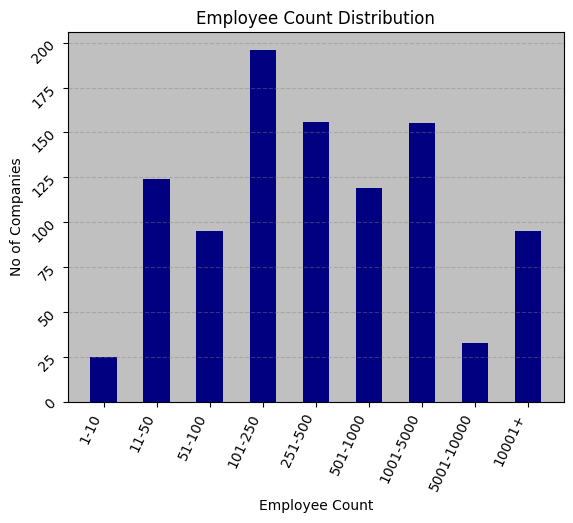

1-10          2.51
11-50        12.42
51-100        9.52
101-250      19.64
251-500      15.63
501-1000     11.92
1001-5000    15.53
5001-10000    3.31
10001+        9.52
Name: EMPLOYEE_NUMBER, dtype: float64

In [104]:
employee_counts=comp_df['EMPLOYEE_NUMBER'].value_counts()
custom_order = ['1-10', '11-50', '51-100', '101-250', '251-500', '501-1000', '1001-5000', '5001-10000', '10001+']
employee_counts = employee_counts.reindex(custom_order)

total = sum(employee_counts)
percentage = (employee_counts / total ) * 100
bars = plt.bar(employee_counts.index, employee_counts.values, color='navy', width=0.5)

plt.xlabel('Employee Count')
plt.ylabel('No of Companies')
plt.title('Employee Count Distribution')
plt.grid(axis='y', linestyle='--', color='grey', alpha=0.4)
plt.rcParams.update({'axes.facecolor':'silver'})
plt.xticks(rotation=65, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()
percentage


According to the graph, it can be seen that there are few companies(9.52%) which employ more than 10000 employees. However most companies (19.52%) employ 101-250 persons followed by around 15.63% companies employing around 251-500 persons. The most shocking observation is that only 3.31% companies employ 5000-10000 employees.   

# No of Companies founded since 2000 year wise

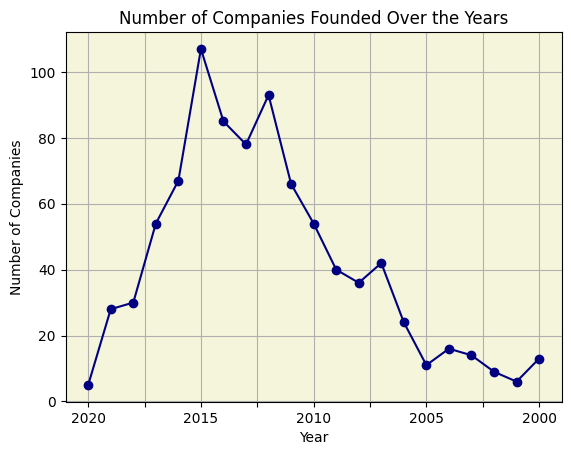

In [107]:
comp_df['YEAR'] = comp_df['FOUNDED_ON'].str.extract(r'(\d{4})')
count=comp_df['YEAR'].value_counts().sort_index(ascending=False).head(21)
count.plot(kind='line', marker='o', color='navy')
plt.title('Number of Companies Founded Over the Years')
plt.rcParams.update({'axes.facecolor':'beige'})
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.show()



From the above graph we could see that most no of companies have been founded after 2005. Lets calculate the percentage of companies found after 2005.


In [8]:
no_of_companies_2005=comp_df[comp_df['YEAR'] >= '2005'].shape[0]
total_no_of_companies=comp_df.shape[0]
percentage_2005=(no_of_companies_2005/total_no_of_companies)*100
percentage_2005


82.0

We find that 82% comapnies were founded after 2005. Most of the companies were founded between the years between 2010 and 2017. However very few companies were founded around 2019-2020. The main reason could be Corona pandemic.



# Companies alongwith their revenue ranges

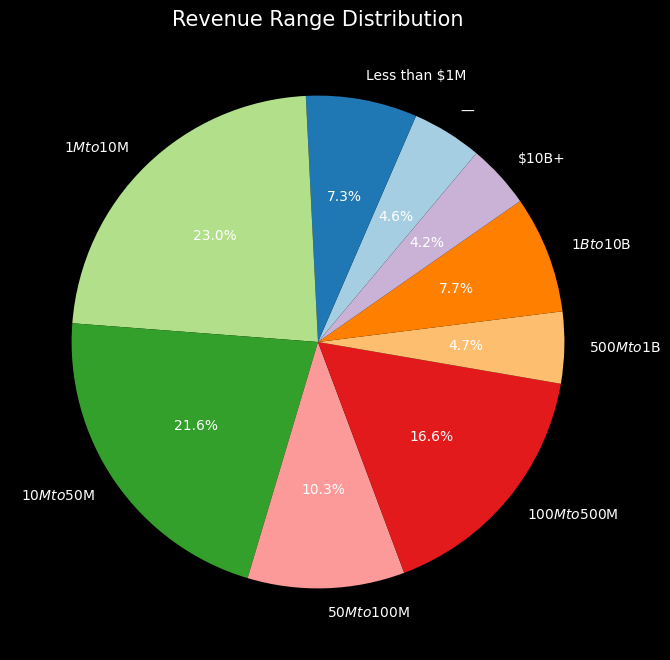

In [64]:
revenue_counts=comp_df['REVENU_RANGE'].value_counts()
custom_order = [
    '—',
    'Less than $1M',
    '$1M to $10M',
    '$10M to $50M',
    '$50M to $100M',
    '$100M to $500M',
    '$500M to $1B',
    '$1B to $10B',
    '$10B+'

]
revenue_counts = revenue_counts.reindex(custom_order)
#revenue_counts.plot(kind='bar', color='green')
plt.figure(figsize=(15, 8))
plt.pie(revenue_counts, labels=revenue_counts.index, autopct='%1.1f%%', startangle=50,textprops={'color': 'white'}, colors=plt.cm.Paired.colors)
fig = plt.gcf()
fig.set_facecolor('black')
plt.title('Revenue Range Distribution', color='white', fontsize='15')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

Most prevalent Job Titles across Companies

In [10]:
emp_df['JOB_TITLES']=emp_df['JOB_TITLES'].replace(['Founder & CEO','Founder and CEO'],'Founder and CEO ')
emp_df['JOB_TITLES']=emp_df['JOB_TITLES'].replace(['Chief Technology Officer'],'CTO')
emp_df['JOB_TITLES']=emp_df['JOB_TITLES'].replace(['Chief Operating Officer'],'COO')
emp_df['JOB_TITLES']=emp_df['JOB_TITLES'].replace(['Co-Founder and CEO','Co-founder & CEO'],'Co-Founder & CEO')
emp_df['JOB_TITLES']=emp_df['JOB_TITLES'].replace(['Chief Executive Officer'],'CEO')
emp_df['JOB_TITLES']=emp_df['JOB_TITLES'].replace(['Software Developer'],'Software Engineer')
emp_df['JOB_TITLES']=emp_df['JOB_TITLES'].replace(['Chief Financial Officer'],'CFO')



title_counts=emp_df['JOB_TITLES'].value_counts().head(40)
title_counts

Software Engineer                   549
Product Manager                     232
CEO                                 206
Co-Founder & CEO                    190
Managing Director                   186
CFO                                 185
Senior Software Engineer            179
CTO                                 157
Co-Founder                          157
Founder and CEO                     148
COO                                 115
Director                            113
Vice President                      109
Engineering Manager                  93
Member of the Board of Directors     82
Data Scientist                       76
Program Manager                      74
Developer Advocate                   73
General Manager                      72
Senior Program Manager               71
Chief Marketing Officer              63
Engineer                             60
Founder                              59
Principal Program Manager            59
Senior Product Manager               59


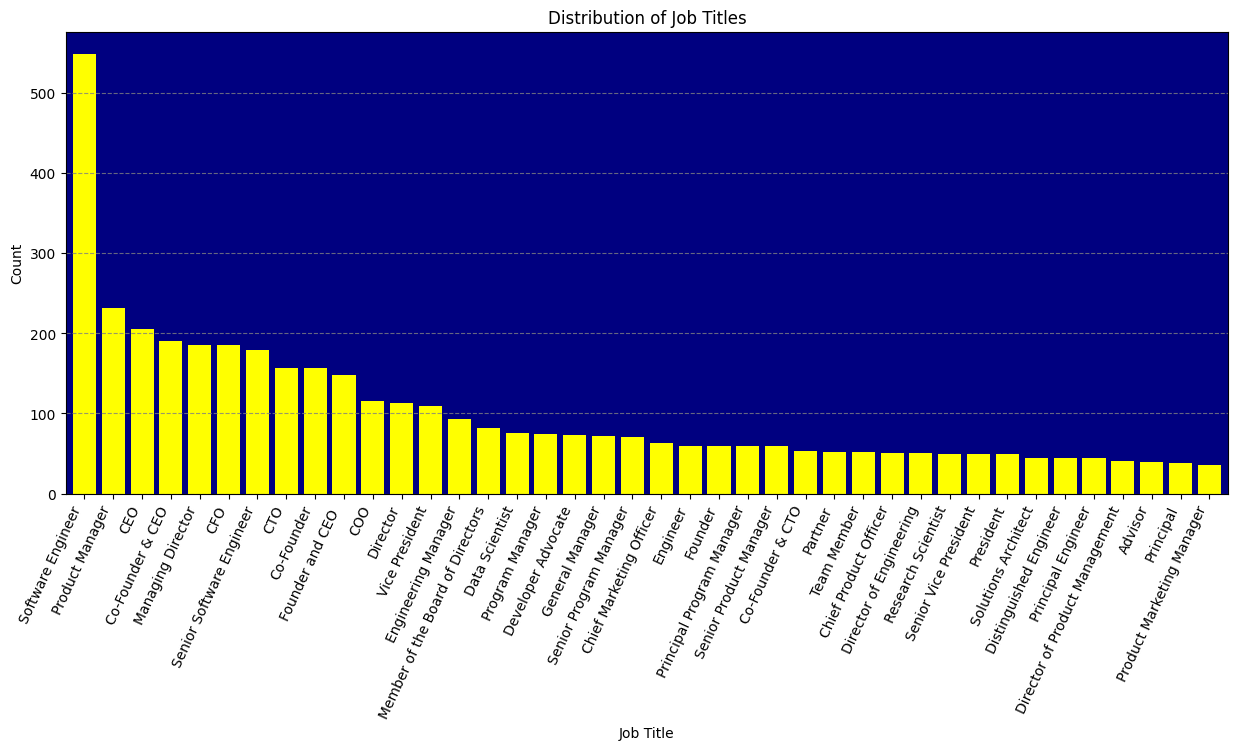

In [109]:
plt.figure(figsize=(15, 6))
title_counts.plot(kind='bar', color='yellow', width=0.8)
#plt.pie(title_counts, labels=title_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.rcParams.update({'axes.facecolor':'navy'})
plt.title('Distribution of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Distribution of Job Titles')
plt.xticks(rotation=65, ha='right')
plt.grid(axis='y', linestyle='--', color='grey', alpha=0.8)
plt.show()

# Insights on investment

List of companies with atleast 1 round of investment

In [12]:
companies_with_investment = invest_df['COMPANY_NAME'].dropna().value_counts()
companies_with_investment

Tesla              36
SpaceX             35
Uber               27
Ola                25
Lucid              23
                   ..
NEC Corporation     1
Orange              1
BP                  1
Skuad               1
Merck               1
Name: COMPANY_NAME, Length: 935, dtype: int64

Here 2 more columns have been added to investment sheet containing the currency and the amount separately

In [13]:
# Define the currency symbols map
currency_symbols = {
    '€': 'EUR',
    'CN¥': 'CNY',
    '¥': 'JPY',
    '₹': 'INR',
    '£': 'GBP',
    'CA$': 'CAD',
    'A$': 'AUD',
    'R$': 'BRL',
    'ZAR': 'ZAR',
    'S$': 'SGD',
    'SGD': 'SGD',
    'Dhs': 'AED',
    '₩': 'KRW',
    'CHF': 'CHF',
    'MYR': 'MYR',
    'SEK': 'SEK',
    '₽': 'RUB',
    'RUB': 'RUB',
    '$': 'USD'
}

# Define the function to extract numerical amount and currency symbol
def extract_currency_amount(value):
    currency = None
    amount = None

    # Loop through the currency_symbols to find the matching currency
    for symbol in currency_symbols:
        if symbol in value:
            currency = currency_symbols[symbol]
            # Remove the symbol and any commas from the amount
            amount = value.replace(symbol, '').replace(',', '').strip()
            #break

            return currency, amount

    # If no matching currency symbol is found, return None for both
    return float('NaN'), float('NaN')

# Apply the function to the 'MONEY_RAISED' column
invest_df[['CURRENCY', 'AMOUNT']] = invest_df.apply(
    lambda row: extract_currency_amount(row['MONEY_RAISED']), axis=1, result_type='expand'
)

invest_df


,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,CURRENCY,AMOUNT
0,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",—,USD,250000000
1,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture,USD,50000000
2,Pipe,Seed,"$6,000,000","Feb 25, 2020",Seed,USD,6000000
3,Pipe,Seed,"$10,000,000","Jun 24, 2020",Seed,USD,10000000
4,Epic Games,Seed,"$1,000,000,000","Apr 13, 2021",Seed,USD,1000000000
...,...,...,...,...,...,...,...
5932,PTC,Post-IPO Equity,"$1,000,000,000","Jun 11, 2018",—,USD,1000000000
5933,Berkshire Hathaway,Post-IPO Equity,"$3,510,000","Aug 15, 2019",—,USD,3510000
5934,Wipro Technologies,Post-IPO Equity,—,"Oct 1, 2006",—,NaN,NaN
5935,Wipro Technologies,Post-IPO Equity,—,"Sep 1, 2007",—,NaN,NaN


Now all the currency values are changed to USD

In [14]:
# Define exchange rates for various currencies to USD
exchange_rates = {
    'EUR': 1.12,
    'CNY': 0.15,
    'JPY': 0.0091,
    'INR': 0.014,
    'GBP': 1.37,
    'CAD': 0.78,
    'AUD': 0.74,
    'BRL': 0.19,
    'ZAR': 0.068,
    'SGD': 0.74,
    'AED': 0.27,
    'KRW': 0.00088,
    'CHF': 1.10,
    'MYR': 0.24,
    'SEK': 0.11,
    'RUB': 0.014,
    'USD': 1.0
}

# Extract the date and convert it to a datetime object
invest_df['ANNOUNCED_DATE'] = pd.to_datetime(invest_df['ANNOUNCED_DATE'])

# Define a function to convert currency based on manually provided exchange rates
def convert_currency(row):
    try:
        if row['CURRENCY'] == 'USD':
            return float(row['AMOUNT'])
        elif row['CURRENCY'] in exchange_rates:
            return float(row['AMOUNT']) * exchange_rates[row['CURRENCY']]
        else:
            return pd.NA
    except ValueError:
        return pd.NA

# Apply the conversion function to create a new column 'AMT_IN_USD'
invest_df['AMT_IN_USD'] = invest_df.apply(convert_currency, axis=1)

# Display the updated DataFrame
invest_df

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,CURRENCY,AMOUNT,AMT_IN_USD
0,Pipe,Venture - Series Unknown,"$250,000,000",2021-03-31,—,USD,250000000,250000000.0
1,Pipe,Series A,"$50,000,000",2021-03-09,Early Stage Venture,USD,50000000,50000000.0
2,Pipe,Seed,"$6,000,000",2020-02-25,Seed,USD,6000000,6000000.0
3,Pipe,Seed,"$10,000,000",2020-06-24,Seed,USD,10000000,10000000.0
4,Epic Games,Seed,"$1,000,000,000",2021-04-13,Seed,USD,1000000000,1000000000.0
...,...,...,...,...,...,...,...,...
5932,PTC,Post-IPO Equity,"$1,000,000,000",2018-06-11,—,USD,1000000000,1000000000.0
5933,Berkshire Hathaway,Post-IPO Equity,"$3,510,000",2019-08-15,—,USD,3510000,3510000.0
5934,Wipro Technologies,Post-IPO Equity,—,2006-10-01,—,NaN,NaN,<NA>
5935,Wipro Technologies,Post-IPO Equity,—,2007-09-01,—,NaN,NaN,<NA>


Total Money Raised by each company in USD

In [15]:
merged_df1=comp_df.merge(invest_df,on='COMPANY_NAME',how='outer')
merged_df1=merged_df1.merge(acquisition_df,on='COMPANY_NAME',how='outer')
merged_df1['total_money_raised'] = merged_df1['AMT_IN_USD'].sum()
total_money_raised_per_company=merged_df1.groupby(['COMPANY_NAME'])['AMT_IN_USD'].sum()
total_money_raised_per_company.sort_values
total_money_raised_per_company



COMPANY_NAME
1mg                           190080000.0
23andMe                      1639706640.0
360VUZ                          8443000.0
4D Molecular Therapeutics     171999995.0
908 Devices                    83100000.0
                                 ...     
monday.com                     84100000.0
nCino                        1124267370.0
project44                     311000000.0
tabby                          30000000.0
ultimate.ai                    28557600.0
Name: AMT_IN_USD, Length: 1000, dtype: object

In [16]:
comp_invest_df = pd.merge(comp_df, invest_df, on='COMPANY_NAME', how='inner')

# Group by 'COUNTRY' and sum the 'CONVERTED_MONEY_RAISED'
total_raised_per_country = comp_invest_df.groupby(['COUNTRY'])['AMT_IN_USD'].sum().reset_index()

total_raised_per_country_sorted = total_raised_per_country.sort_values(by='AMT_IN_USD', ascending=False)
total_raised_per_country_sorted = total_raised_per_country_sorted.rename(columns={'AMT_IN_USD': 'TOTAL_AMT_IN_USD'})
display(total_raised_per_country_sorted)

,COUNTRY,TOTAL_AMT_IN_USD
43,United States,306467774927.97998
7,China,122361067728.0
15,India,67245739022.0
42,United Kingdom,37567508415.640007
13,Germany,29166003321.119999
29,Russian Federation,13655300000.0
4,Canada,11928585800.0
16,Indonesia,8912700000.0
36,Switzerland,7224200000.0
35,Sweden,6345213851.150001


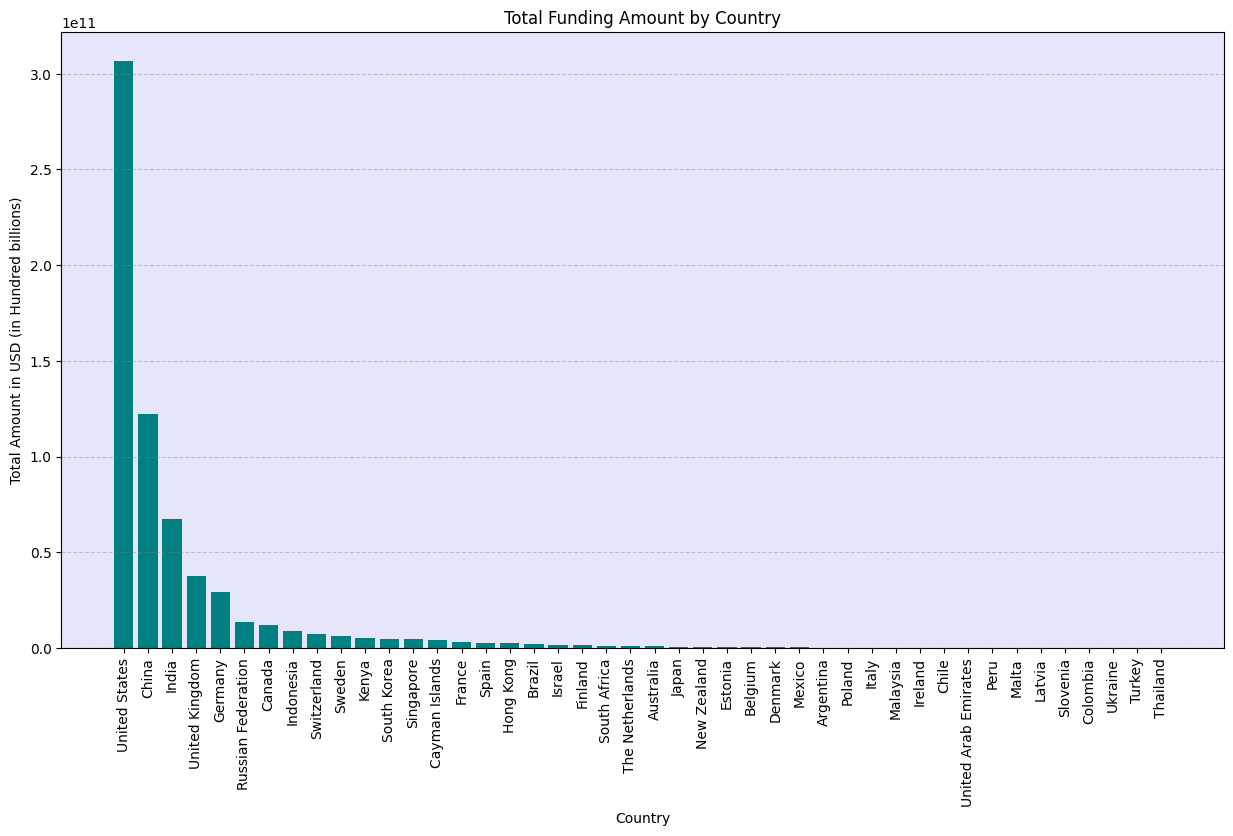

In [70]:
plt.figure(figsize=(15, 8))
plt.bar(total_raised_per_country_sorted['COUNTRY'], total_raised_per_country_sorted['TOTAL_AMT_IN_USD'], color='teal')
plt.rcParams.update({'axes.facecolor':'lavender'})
plt.xlabel('Country')
plt.ylabel('Total Amount in USD (in Hundred billions)')
plt.title('Total Funding Amount by Country')
plt.grid( axis='y',linestyle='--', color='grey', alpha=0.4)
plt.xticks(rotation=90)
plt.show()

# Acquisition Insights

Similarly in Acquisition sheet, we convert all currencies to USD and store them in a separate column

In [18]:
# Define the currency symbols map
currency_symbols = {
    '€': 'EUR',
    'CN¥': 'CNY',
    '¥': 'JPY',
    '₹': 'INR',
    '£': 'GBP',
    'CA$': 'CAD',
    'A$': 'AUD',
    'R$': 'BRL',
    'ZAR': 'ZAR',
    'S$': 'SGD',
    'SGD': 'SGD',
    'Dhs': 'AED',
    '₩': 'KRW',
    'CHF': 'CHF',
    'MYR': 'MYR',
    'SEK': 'SEK',
    '₽': 'RUB',
    'RUB': 'RUB',
    '$': 'USD'
}

# Define the function to extract numerical amount and currency symbol
def extract_currency_amount(value):
    currency = None
    amount = None

    # Loop through the currency_symbols to find the matching currency
    for symbol in currency_symbols:
        if symbol in value:
            currency = currency_symbols[symbol]
            # Remove the symbol and any commas from the amount
            amount = value.replace(symbol, '').replace(',', '').strip()
            #break

            return currency, amount

    # If no matching currency symbol is found, return None for both
    return float('NaN'), float('NaN')

# Apply the function to the 'MONEY_RAISED' column
acquisition_df[['CURRENCY', 'AMOUNT']] = acquisition_df.apply(
    lambda row: extract_currency_amount(row['PRICE']), axis=1, result_type='expand'
)


# Define exchange rates for various currencies to USD
exchange_rates = {
    'EUR': 1.12,
    'CNY': 0.15,
    'JPY': 0.0091,
    'INR': 0.014,
    'GBP': 1.37,
    'CAD': 0.78,
    'AUD': 0.74,
    'BRL': 0.19,
    'ZAR': 0.068,
    'SGD': 0.74,
    'AED': 0.27,
    'KRW': 0.00088,
    'CHF': 1.10,
    'MYR': 0.24,
    'SEK': 0.11,
    'RUB': 0.014,
    'USD': 1.0
}

# Extract the date and convert it to a datetime object
acquisition_df['ANNOUNCED_DATE'] = pd.to_datetime(acquisition_df['ANNOUNCED_DATE'])

# Define a function to convert currency based on manually provided exchange rates
def convert_currency(row):
    try:
        if row['CURRENCY'] == 'USD':
            return float(row['AMOUNT'])
        elif row['CURRENCY'] in exchange_rates:
            return float(row['AMOUNT']) * exchange_rates[row['CURRENCY']]
        else:
            return pd.NA
    except ValueError:
        return pd.NA

# Apply the conversion function to create a new column 'AMT_IN_USD'
acquisition_df['AMT_IN_USD_ACQUISITION'] = acquisition_df.apply(convert_currency, axis=1)

# Display the updated DataFrame

acquisition_df


,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE,CURRENCY,AMOUNT,AMT_IN_USD_ACQUISITION
0,IBM,Turbonomic,2021-04-29,"$2,000,000,000",Acquisition,USD,2000000000,2000000000.0
1,IBM,myInvenio,2021-04-15,—,Acquisition,NaN,NaN,<NA>
2,IBM,Taos Mountain,2021-01-14,—,Acquisition,NaN,NaN,<NA>
3,IBM,Cloudant,2014-02-24,—,Acquisition,NaN,NaN,<NA>
4,IBM,TruQua,2020-11-16,—,Acquisition,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...
5284,Opendoor,Open Listings,2018-09-11,—,—,NaN,NaN,NaN
5285,Inscripta,Solana Biosciences,2018-09-05,—,Acquisition,NaN,NaN,NaN
5286,Glossier,Dynamo,2018-02-28,—,Acquisition,NaN,NaN,NaN
5287,FreightWaves,StakUp,2019-06-03,—,Acquisition,NaN,NaN,NaN


The highest amount spent per acquiring company. Since many acquiring prices are unknown so those rows have been removed

---



In [19]:
pivot_acquisition = acquisition_df.pivot_table(values='AMT_IN_USD_ACQUISITION', index='COMPANY_NAME', aggfunc='max')
pivot_acquisition.rename(columns={'AMT_IN_USD_ACQUISITION': 'MAX_PRICE'}, inplace=True)
pivot_acquisition = pivot_acquisition[pivot_acquisition['MAX_PRICE'] != '—']
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pivot_acquisition

,MAX_PRICE
COMPANY_NAME,
AbCellera Biologics,90000000.00
Accenture,205000000.00
AdaptHealth,2000000000.00
Airbnb,200000000.00
Alibaba Group,9500000000.00
...,...
Zillow,108000000.00
Zomato,55000000.00
Zscaler,13000000.00


The below table shows the number of companies which received atleast Series A funding



In [20]:
invest_seriesA=invest_df.query('FUNDING_TYPE=="Series A"')
cols=['COMPANY_NAME','AMT_IN_USD', 'FUNDING_TYPE']
invest_seriesA=invest_seriesA[cols]
invest_seriesA = invest_seriesA[pd.to_numeric(invest_seriesA['AMT_IN_USD'], errors='coerce').notna()]

# Convert AMT_IN_USD to numeric
invest_seriesA['AMT_IN_USD'] = pd.to_numeric(invest_seriesA['AMT_IN_USD'])

invest_seriesA

,COMPANY_NAME,AMT_IN_USD,FUNDING_TYPE
1,Pipe,50000000.00,Series A
13,Brex,7000000.00,Series A
45,Paxos,25000000.00,Series A
49,Chargebee,800000.00,Series A
59,TrueLayer,3000000.00,Series A
...,...,...,...
5912,WhatsApp,8000000.00,Series A
5920,Cainiao Logistics,1500000000.00,Series A
5921,Amperity,9000000.00,Series A
5923,Medium,25000000.00,Series A


Now there are many companies which have multiple series A rounds, so lets calculate the average amount received in Series A per company

In [21]:
invest_seriesA=invest_df.query('FUNDING_TYPE=="Series A"')
average_series_A_amount = invest_seriesA.groupby('COMPANY_NAME')['AMT_IN_USD'].mean()
average_series_A_amount

COMPANY_NAME
1mg                    6000000.00
23andMe                8953320.00
360VUZ                 7093000.00
ATAI Life Sciences    25500000.00
AbCellera Biologics   10000000.00
                          ...    
ipsy                   2755795.00
monday.com             7600000.00
project44             10500000.00
tabby                 23000000.00
ultimate.ai           20000000.00
Name: AMT_IN_USD, Length: 561, dtype: float64

The below table shows the total funding received in Series A per company

In [22]:
invest_seriesA = invest_seriesA.groupby('COMPANY_NAME', as_index=False)['AMT_IN_USD'].sum()
invest_seriesA

,COMPANY_NAME,AMT_IN_USD
0,1mg,12000000.00
1,23andMe,8953320.00
2,360VUZ,7093000.00
3,ATAI Life Sciences,25500000.00
4,AbCellera Biologics,10000000.00
...,...,...
556,ipsy,5511590.00
557,monday.com,7600000.00
558,project44,10500000.00
559,tabby,23000000.00


Below, we are finding out the median funding received at Series A

In [23]:
invest_seriesA['AMT_IN_USD'].median()

12000000.0

# Total no of acquisitions made per company


In [24]:
company_counts=acquisition_df['COMPANY_NAME'].value_counts().sort_values(ascending=False)
company_counts_df = pd.DataFrame({'COMPANY_NAME': company_counts.index, 'NO_OF_ACQUISITIONS': company_counts.values})
company_revenue_range = comp_df.groupby('COMPANY_NAME')['REVENU_RANGE'].first()
company_counts_df = pd.merge(company_counts_df, company_revenue_range, on='COMPANY_NAME')
company_counts_df




,COMPANY_NAME,NO_OF_ACQUISITIONS,REVENU_RANGE
0,Microsoft,235,$1B to $10B
1,Cisco,233,$10B+
2,Google,230,$10B+
3,Accenture,215,$10M to $50M
4,EQT,175,$100M to $500M
...,...,...,...
492,Waymo,1,$500M to $1B
493,Indigo,1,$100M to $500M
494,Pindrop,1,$10M to $50M
495,Paddle,1,$1M to $10M


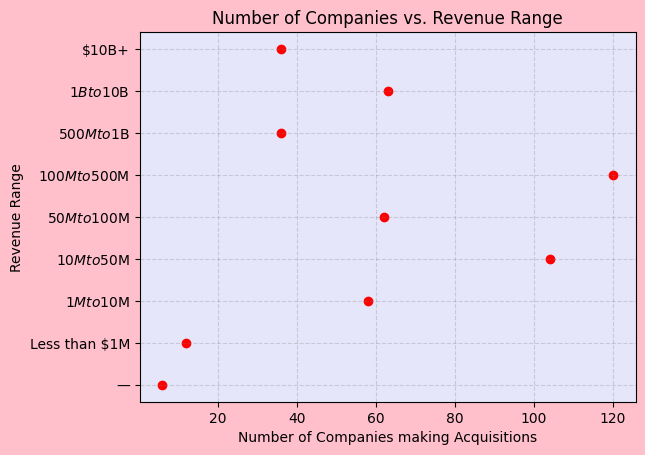

In [71]:
acq_data=company_counts_df['REVENU_RANGE'].value_counts()

custom_order = [
    '—',
    'Less than $1M',
    '$1M to $10M',
    '$10M to $50M',
    '$50M to $100M',
    '$100M to $500M',
    '$500M to $1B',
    '$1B to $10B',
    '$10B+'

]
acq_data = acq_data.reindex(custom_order)

plt.scatter(acq_data.values,acq_data.index, color='red')
fig = plt.gcf()
fig.set_facecolor('pink')
plt.xlabel('Number of Companies making Acquisitions')
plt.ylabel('Revenue Range')
plt.title('Number of Companies vs. Revenue Range')
plt.grid( linestyle='--', color='grey', alpha=0.3)
# Show the plot
plt.show()

We can see that 10B+ companies have been making the most acquisitions. However mid-size companies make low acquisitions

# Employee Insights

Matrix showing number of Employees per designation in all companies

In [32]:
pivot_table = emp_df.groupby(['JOB_TITLES', 'COMPANY_NAME']).size().unstack(fill_value=0)

# Sort the rows based on the sum of each row in descending order
pivot_table = pivot_table.loc[pivot_table.sum(axis=1).sort_values(ascending=False).index]

# Sort the columns based on the sum of each column in descending order
pivot_table = pivot_table[pivot_table.sum().sort_values(ascending=False).index]

top_10_job_titles = pivot_table.head(10)
top_10_job_titles['Total'] = top_10_job_titles.sum(axis=1)

pivot_table

<ipython-input-32-53e1eb60f362>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_job_titles['Total'] = top_10_job_titles.sum(axis=1)


COMPANY_NAME,Microsoft,Google,Facebook,Intel,IBM,Cisco,SAP,Accenture,Uber,Oracle,...,Perfect Diary,VergeSense,Pipe,Exotel,Valiu,Pockit,Embracer Group,Urban Ladder,EdgeQ,JD Logistics
JOB_TITLES,,,,,,,,,,,,,,,,,,,,,
Software Engineer,32,156,54,18,14,7,3,1,18,2,...,0,0,0,0,0,0,0,0,0,0
Product Manager,4,84,34,1,1,4,6,0,3,0,...,0,0,0,0,0,0,0,0,0,0
CEO,2,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
Co-Founder & CEO,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
Managing Director,3,1,1,1,1,2,3,49,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Global Distribution & Marketing Big Data and Analytics Offering Lead,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Global Editor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Global Editor-in-Chief,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Top 25 school alumni working in the companies provided

In [44]:
top_alumni=emp_df['ATTENDED_SCHOOLS'].value_counts().head(25).reset_index()
top_alumni

,index,ATTENDED_SCHOOLS
0,Stanford University,159
1,"University of California, Berkeley",106
2,Massachusetts Institute of Technology - MIT,92
3,Carnegie Mellon University,59
4,Harvard University,57
5,University of Washington,52
6,University of Pennsylvania,50
7,Cornell University,43
8,Harvard Business School,41
9,University of Oxford,40


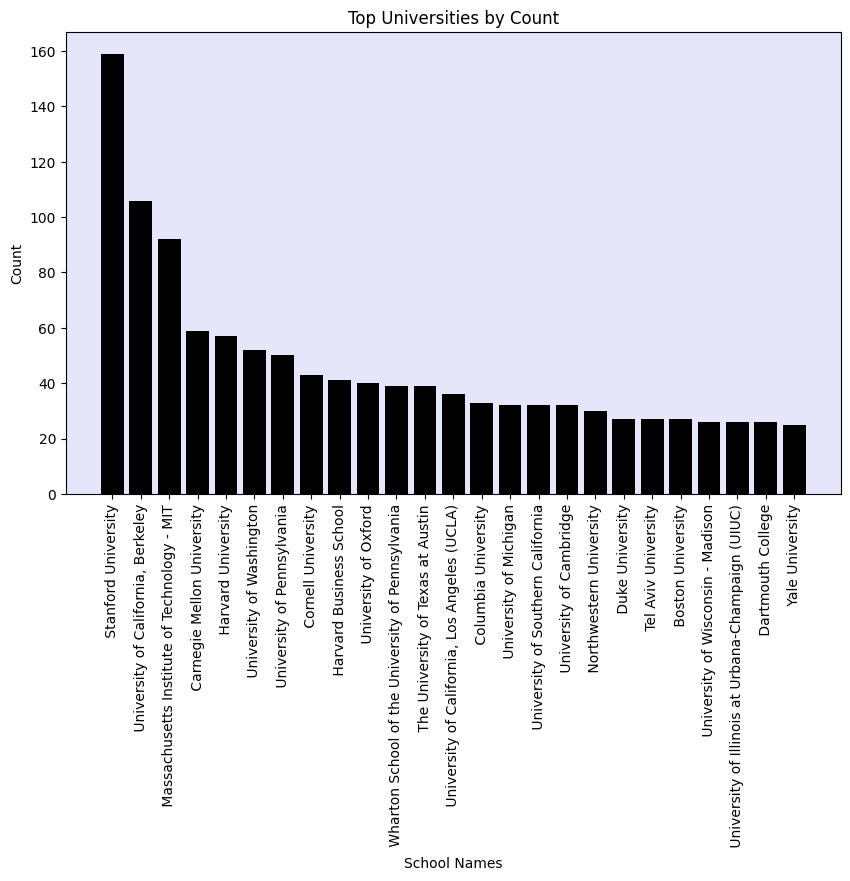

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(top_alumni['index'],top_alumni['ATTENDED_SCHOOLS'],  color='black')
plt.xlabel('School Names')
plt.ylabel('Count')
plt.title('Top Universities by Count')
plt.xticks(rotation=90)
plt.show()

Create function to check if employee graduated from Ivy League School and check how many employee graduated from Ivy League School

In [35]:
def contains_ivy_league(school_string):
    ivy_league_schools = [
        'Brown University', 'Columbia University', 'Cornell University',
        'Dartmouth College', 'Harvard University', 'University of Pennsylvania',
        'Princeton University', 'Yale University'
    ]

    # Check if any Ivy League school is in the string
    return any(ivy_school in school_string for ivy_school in ivy_league_schools)

emp_df = emp_df.dropna(subset=['ATTENDED_SCHOOLS'])
emp_df['Attended_Ivy_League'] = emp_df['ATTENDED_SCHOOLS'].apply(contains_ivy_league)

# Calculate the percentage of CEOs who graduated from an Ivy League school
ivy_league_employee_count = emp_df['Attended_Ivy_League'].sum()
total_employee_count = emp_df.shape[0]
ivy_league_percentage = (ivy_league_employee_count / total_employee_count) * 100

print(f"Number of employees who graduated from an Ivy League University: {ivy_league_employee_count} ({ivy_league_percentage:.2f}%)")

Number of employees who graduated from an Ivy League University: 687 (10.43%)


Employees in data-related roles

In [38]:
data_df = emp_df[emp_df['JOB_TITLES'].str.contains("Data", na=False)]

data_count = len(data_df)
data_percentage = (data_count / total_employee_count) * 100

print(f"Number of employees in data-related roles: {data_count} ({data_percentage:.2f}%)")

Number of employees in data-related roles: 165 (2.51%)


Percentage of data-related graduates from Ivy League University

In [53]:
data_df_school = data_df.dropna(subset=['ATTENDED_SCHOOLS'])
data_df_school['Attended_Ivy_League'] = data_df_school['ATTENDED_SCHOOLS'].apply(contains_ivy_league)

ivy_league_data_count = data_df_school['Attended_Ivy_League'].sum()
ivy_league_data_percentage = (ivy_league_data_count / data_count) * 100

print(f"Number of employees in data-related roles who graduated from Ivy League University: {ivy_league_data_count} ({ivy_league_data_percentage:.2f}%)")

Number of employees in data-related roles who graduated from Ivy League University: 9 (5.45%)


# Count of CEOs

In [75]:
ceo_df = emp_df[emp_df['JOB_TITLES'].str.contains("CEO", na=False)]

ceo_count = len(ceo_df)
ceo_percentage = (ceo_count / total_employee_count) * 100

print(f"Number of CEOs: {ceo_count} ({ceo_percentage:.2f}%)")

ceo_df[["JOB_TITLES", "COMPANY_NAME","ATTENDED_SCHOOLS"]]

Number of CEOs: 357 (5.42%)


,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS
107,CEO,Google,Indian Institute of Technology Kharagpur Stan...
491,"CEO, Google Cloud",Google,Princeton University Stanford Graduate School...
1704,Co-Founder & CEO,Airbnb,Rhode Island School of Design
1879,CEO,Apple,Duke University
2056,President & CEO,Berkshire Hathaway,Columbia University University of Nebraska-Li...
...,...,...,...
20451,CEO,Plug Power,Temple University
20556,Co-Founder & CEO,Signals Analytics,IDC Herzliya
20559,CEO,QueQ,King Mongkut's Institute of Technology Ladkra...
20560,CEO,Exclaimer,University of Greenwich


Percentage of CEOs who graduated from Ivy League University

In [76]:
ceo_df_school = ceo_df.dropna(subset=['ATTENDED_SCHOOLS'])
ceo_df_school['Attended_Ivy_League'] = ceo_df_school['ATTENDED_SCHOOLS'].apply(contains_ivy_league)

# Calculate the percentage of CEOs who graduated from an Ivy League school
ivy_league_ceo_count = ceo_df_school['Attended_Ivy_League'].sum()
ivy_league_ceo_percentage = (ivy_league_ceo_count / ceo_count) * 100

print(f"Number of CEOs who graduated from Ivy League University: {ivy_league_ceo_count} ({ivy_league_ceo_percentage:.2f}%)")

Number of CEOs who graduated from Ivy League University: 68 (19.05%)


Most common school attended by CEOs

In [81]:
import re
from collections import Counter

all_schools_text = ' '.join(ceo_df['ATTENDED_SCHOOLS'].dropna().astype(str))
words = re.findall(r'\b\w+\b', all_schools_text)
words = [word.lower() for word in words]  # Exclude short words that are likely not school names if len(word) > 2
word_counts = Counter(words)

excluded_words = {'university', 'school', 'college', 'institute', 'technology',
                 'the', 'and', 'of', 'for', 'business', 'management', 'law',
                 'graduate', 'science', 'new', 'state', 'indian', 'at','san' }

filtered_common_words = [(word, count) for word, count in word_counts.items() if word not in exclude_words]

top_10_words = sorted(filtered_common_words, key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 most common specific school names
for word, count in top_10_words:
    print(f"{word}: {count}")

stanford: 38
harvard: 30
pennsylvania: 26
california: 17
wharton: 15
columbia: 14
berkeley: 13
london: 11
texas: 9
michigan: 9


# Relation between Revenue Range and Employee Numbers

First we find the employee range for each revenue-range

In [27]:
dfg = comp_df.groupby(by=["REVENU_RANGE", "EMPLOYEE_NUMBER"]).size().reset_index(name="Count")
dfg



,REVENU_RANGE,EMPLOYEE_NUMBER,Count
0,$100M to $500M,10001+,6
1,$100M to $500M,1001-5000,63
2,$100M to $500M,101-250,10
3,$100M to $500M,251-500,30
4,$100M to $500M,5001-10000,11
...,...,...,...
59,—,101-250,2
60,—,11-50,27
61,—,251-500,2
62,—,51-100,5


In [28]:
pivot_comp_corr=dfg.pivot_table(index='REVENU_RANGE',
                                columns='EMPLOYEE_NUMBER',
                                values='Count')

pivot_comp_corr

EMPLOYEE_NUMBER,1-10,10001+,1001-5000,101-250,11-50,251-500,5001-10000,501-1000,51-100,—
REVENU_RANGE,,,,,,,,,,
$100M to $500M,NaN,6.00,63.00,10.00,NaN,30.00,11.00,43.00,3.00,NaN
$10B+,1.00,37.00,3.00,NaN,NaN,1.00,NaN,NaN,NaN,NaN
$10M to $50M,1.00,4.00,20.00,71.00,14.00,57.00,1.00,32.00,16.00,NaN
$1B to $10B,NaN,33.00,17.00,3.00,NaN,4.00,15.00,4.00,1.00,NaN
$1M to $10M,11.00,4.00,4.00,74.00,53.00,26.00,NaN,7.00,51.00,NaN
$500M to $1B,NaN,7.00,24.00,3.00,NaN,5.00,5.00,2.00,1.00,NaN
$50M to $100M,1.00,3.00,23.00,11.00,2.00,28.00,1.00,31.00,3.00,NaN
Less than $1M,4.00,1.00,NaN,22.00,28.00,3.00,NaN,NaN,15.00,NaN
—,7.00,NaN,1.00,2.00,27.00,2.00,NaN,NaN,5.00,2.00


Properly arranging the data in ascending order for both column and row

In [29]:
ordered_columns = ["1-10", "11-50", "51-100", "101-250", "251-500", "501-1000", "1001-5000", "5001-10000", "10001+", "—"]
ordered_index = ["Less than $1M", "$1M to $10M", "$10M to $50M", "$50M to $100M", "$100M to $500M", "$500M to $1B", "$1B to $10B", "$10B+", "—"]

pivot_comp_corr = pivot_comp_corr[ordered_columns]
pivot_comp_corr = pivot_comp_corr.reindex(ordered_index)
pivot_comp_corr = pivot_comp_corr.fillna(0)
pivot_comp_corr

EMPLOYEE_NUMBER,1-10,11-50,51-100,101-250,251-500,501-1000,1001-5000,5001-10000,10001+,—
REVENU_RANGE,,,,,,,,,,
Less than $1M,4.00,28.00,15.00,22.00,3.00,0.00,0.00,0.00,1.00,0.00
$1M to $10M,11.00,53.00,51.00,74.00,26.00,7.00,4.00,0.00,4.00,0.00
$10M to $50M,1.00,14.00,16.00,71.00,57.00,32.00,20.00,1.00,4.00,0.00
$50M to $100M,1.00,2.00,3.00,11.00,28.00,31.00,23.00,1.00,3.00,0.00
$100M to $500M,0.00,0.00,3.00,10.00,30.00,43.00,63.00,11.00,6.00,0.00
$500M to $1B,0.00,0.00,1.00,3.00,5.00,2.00,24.00,5.00,7.00,0.00
$1B to $10B,0.00,0.00,1.00,3.00,4.00,4.00,17.00,15.00,33.00,0.00
$10B+,1.00,0.00,0.00,0.00,1.00,0.00,3.00,0.00,37.00,0.00
—,7.00,27.00,5.00,2.00,2.00,0.00,1.00,0.00,0.00,2.00


Since the data has varying ranges of revenue we are normalizing the dataframe

In [30]:
from sklearn.preprocessing import normalize
normalized_df = pd.DataFrame(normalize(pivot_comp_corr, axis=1, norm='l1'), columns=pivot_comp_corr.columns, index=pivot_comp_corr.index)
normalized_df

EMPLOYEE_NUMBER,1-10,11-50,51-100,101-250,251-500,501-1000,1001-5000,5001-10000,10001+,—
REVENU_RANGE,,,,,,,,,,
Less than $1M,0.05,0.38,0.21,0.30,0.04,0.00,0.00,0.00,0.01,0.00
$1M to $10M,0.05,0.23,0.22,0.32,0.11,0.03,0.02,0.00,0.02,0.00
$10M to $50M,0.00,0.06,0.07,0.33,0.26,0.15,0.09,0.00,0.02,0.00
$50M to $100M,0.01,0.02,0.03,0.11,0.27,0.30,0.22,0.01,0.03,0.00
$100M to $500M,0.00,0.00,0.02,0.06,0.18,0.26,0.38,0.07,0.04,0.00
$500M to $1B,0.00,0.00,0.02,0.06,0.11,0.04,0.51,0.11,0.15,0.00
$1B to $10B,0.00,0.00,0.01,0.04,0.05,0.05,0.22,0.19,0.43,0.00
$10B+,0.02,0.00,0.00,0.00,0.02,0.00,0.07,0.00,0.88,0.00
—,0.15,0.59,0.11,0.04,0.04,0.00,0.02,0.00,0.00,0.04


From the above data we plot a bar graph

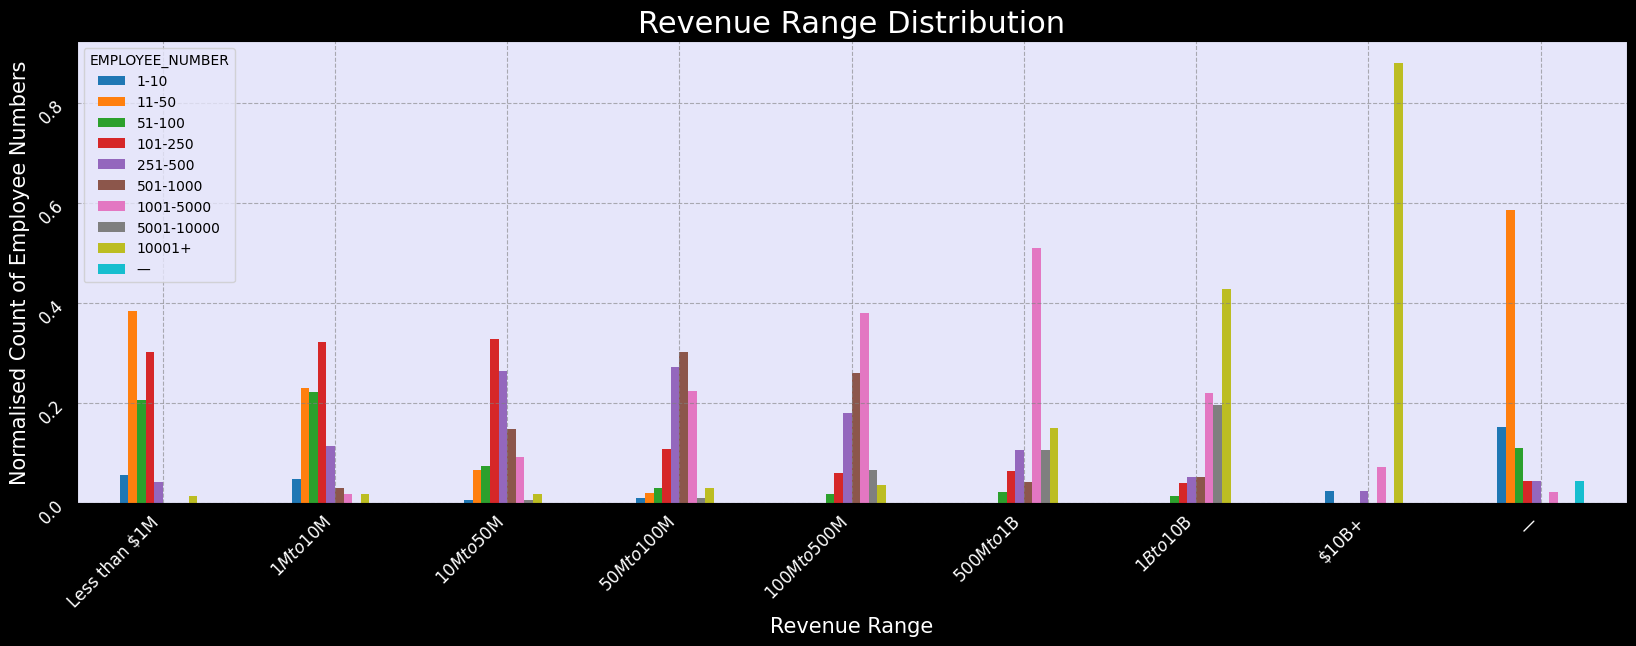

In [31]:
normalized_df.plot(kind='bar',figsize=(20, 6))
plt.xlabel('Revenue Range', color='white', fontsize='15')
plt.ylabel('Normalised Count of Employee Numbers', color='white', fontsize='15')
plt.title('Revenue Range Distribution', color='white', fontsize='22')
plt.xticks(rotation=45, ha='right', color='white', fontsize='12')
plt.yticks(rotation=45, ha='right', color='white', fontsize='12')
plt.grid(linestyle='--', color='grey', alpha=0.6)
fig = plt.gcf()
fig.set_facecolor('black')
plt.show()